<a href="https://colab.research.google.com/github/Gab-mf/EDA-microdados-ENEM/blob/main/EDA_microdados_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("MICRODADOS_ENEM_2022.csv", encoding="ISO-8859-1", sep=";")

In [3]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45955 entries, 0 to 45954
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            45955 non-null  int64  
 1   NU_ANO                  45955 non-null  int64  
 2   TP_FAIXA_ETARIA         45955 non-null  int64  
 3   TP_SEXO                 45955 non-null  object 
 4   TP_ESTADO_CIVIL         45955 non-null  int64  
 5   TP_COR_RACA             45955 non-null  int64  
 6   TP_NACIONALIDADE        45955 non-null  int64  
 7   TP_ST_CONCLUSAO         45955 non-null  int64  
 8   TP_ANO_CONCLUIU         45955 non-null  int64  
 9   TP_ESCOLA               45955 non-null  int64  
 10  TP_ENSINO               13885 non-null  float64
 11  IN_TREINEIRO            45955 non-null  int64  
 12  CO_MUNICIPIO_ESC        7828 non-null   float64
 13  NO_MUNICIPIO_ESC        7828 non-null   object 
 14  CO_UF_ESC               7828 non-null 

In [5]:
agrupar_por_sexo = df.groupby('TP_SEXO')['NU_INSCRICAO'].agg('count').reset_index()
agrupar_por_sexo

,TP_SEXO,NU_INSCRICAO
0,F,30952
1,M,15003


In [6]:
agrupar_por_sexo['porcentagem (%)'] = round((agrupar_por_sexo['NU_INSCRICAO']/agrupar_por_sexo['NU_INSCRICAO'].sum()*100), 2)
agrupar_por_sexo

,TP_SEXO,NU_INSCRICAO,porcentagem (%)
0,F,30952,67.35
1,M,15003,32.65


In [7]:
agrupar_por_sexo.rename(columns={'NU_INSCRICAO':'Total'}, inplace=True)

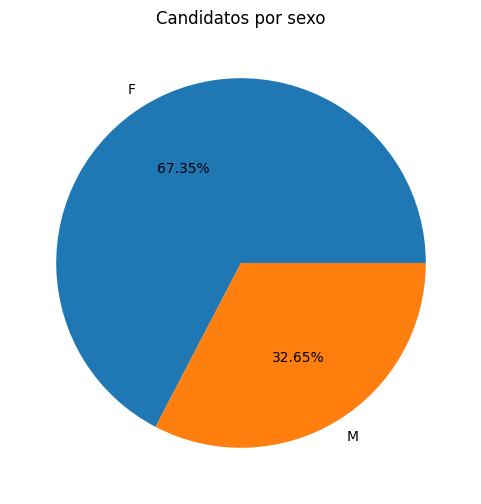

In [8]:
plt.figure(figsize=(6,6))

plt.pie(agrupar_por_sexo['porcentagem (%)'], labels = agrupar_por_sexo['TP_SEXO'], autopct='%1.2f%%')

plt.title("Candidatos por sexo")

plt.show()

In [9]:
df['TP_FAIXA_ETARIA'].value_counts()

3     9921
2     6610
4     6564
5     4226
11    3345
6     2806
7     2123
12    1913
8     1603
1     1459
9     1278
13    1270
10    1078
14     811
15     486
16     245
17     135
18      56
19      23
20       3
Name: TP_FAIXA_ETARIA, dtype: int64

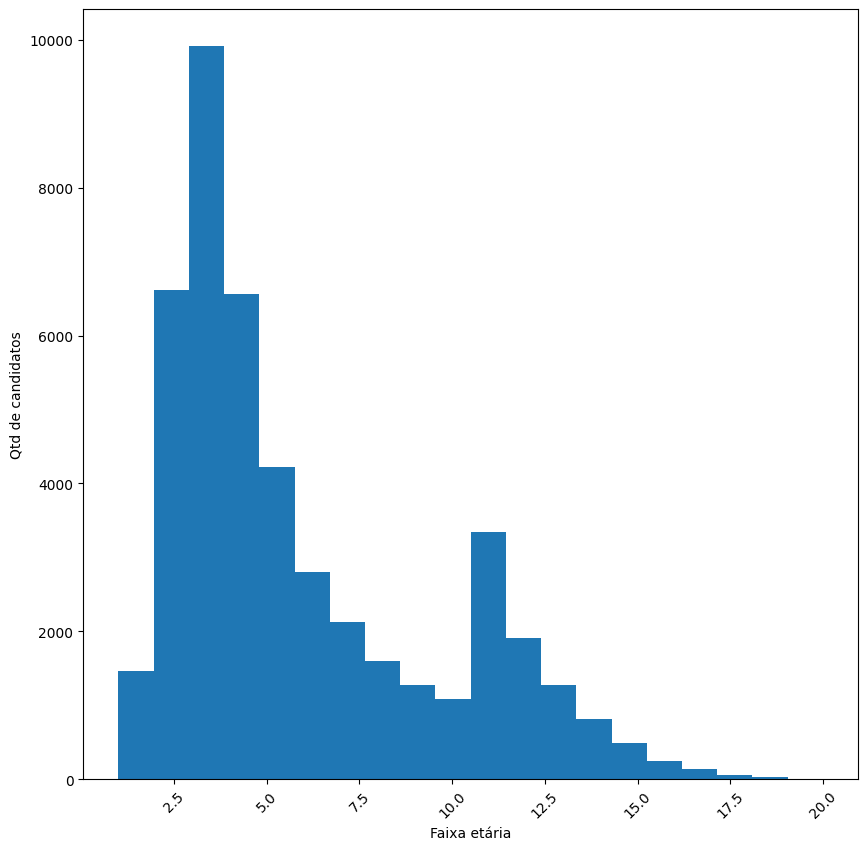

In [10]:
plt.figure(figsize=(10,10))

plt.hist(df['TP_FAIXA_ETARIA'], 20)

plt.xlabel("Faixa etária")
plt.ylabel("Qtd de candidatos")
plt.xticks(rotation=45)

plt.show()

In [11]:
faixa_etaria = {
    1 : "Menor que 17 anos",
    2 : "17 anos",
    3 : "18 anos",
    4 : "19 anos",
    5 : "20 anos",
    6 : "21 anos",
    7 : "22 anos",
    8 : "23 anos",
    9 : "24 anos",
    10 : "25 anos",
    11 : "Entre 26 e 30 anos",
    12 : "Entre 31 e 35 anos",
    13 : "Entre 36 e 40 anos",
    14 : "Entre 41 e 45 anos",
    15 : "Entre 46 e 50 anos",
    16 : "Entre 51 e 55 anos",
    17 : "Entre 56 e 60 anos",
    18 : "Entre 61 e 65 anos",
    19 : "Entre 66 e 70 anos",
    20 : "Maior de 70 anos"
}

In [12]:
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].map(faixa_etaria)

In [13]:
df_faixa_etaria = df.groupby('TP_FAIXA_ETARIA')['NU_INSCRICAO'].agg('count').sort_values(ascending=False).reset_index()
df_faixa_etaria

,TP_FAIXA_ETARIA,NU_INSCRICAO
0,18 anos,9921
1,17 anos,6610
2,19 anos,6564
3,20 anos,4226
4,Entre 26 e 30 anos,3345
5,21 anos,2806
6,22 anos,2123
7,Entre 31 e 35 anos,1913
8,23 anos,1603
9,Menor que 17 anos,1459


In [14]:
cor_raca = {
    0 : "não declarado",
    1 : "Branca",
    2 : "Preta",
    3 : "Parda",
    4 : "Amarela",
    5 : "Indígena",
    6 : "Não dispões a informação"
}

In [15]:
df['TP_COR_RACA'] = df['TP_COR_RACA'].map(cor_raca)

In [16]:
cor_raca = df.groupby('TP_COR_RACA')['NU_INSCRICAO'].agg('count').sort_values(ascending=False).reset_index()
cor_raca

,TP_COR_RACA,NU_INSCRICAO
0,Parda,21869
1,Branca,14967
2,Preta,6997
3,Amarela,923
4,não declarado,856
5,Indígena,343


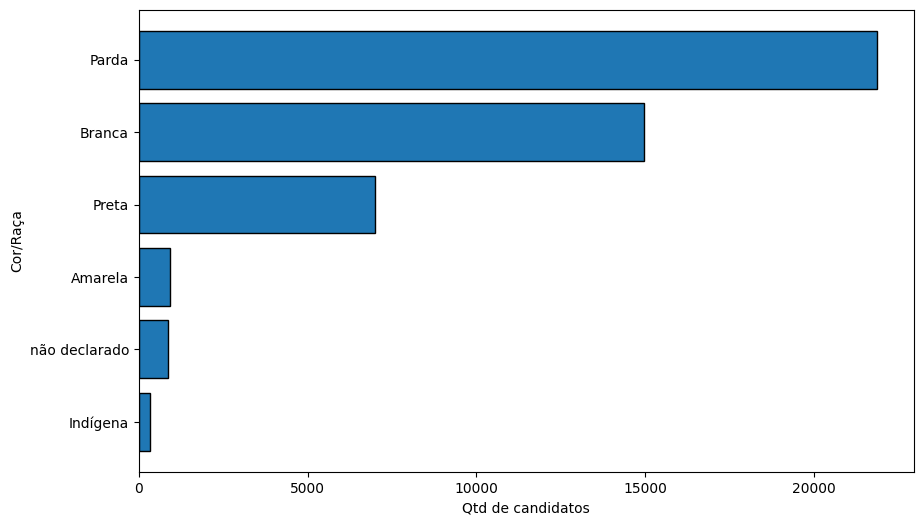

In [17]:
plt.figure(figsize=(10,6))

plt.barh(cor_raca['TP_COR_RACA'], cor_raca['NU_INSCRICAO'], edgecolor='black')

plt.xlabel("Qtd de candidatos")
plt.ylabel("Cor/Raça")
plt.gca().invert_yaxis()

plt.show()

In [18]:
conclusao_em = {
    1 : "concluiu o EM",
    2 : "cursando e concluirei o EM em 2022",
    3 : "cursando e concluirei o EM após 2022",
    4 : "Não conclui e não estou cursando o EM"
}

In [19]:
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].map(conclusao_em)

In [20]:
df_conclusao_em = df.groupby('TP_ST_CONCLUSAO')['NU_INSCRICAO'].agg('count').sort_values(ascending=False).reset_index()
df_conclusao_em

,TP_ST_CONCLUSAO,NU_INSCRICAO
0,concluiu o EM,28190
1,cursando e concluirei o EM em 2022,14652
2,cursando e concluirei o EM após 2022,2960
3,Não conclui e não estou cursando o EM,153


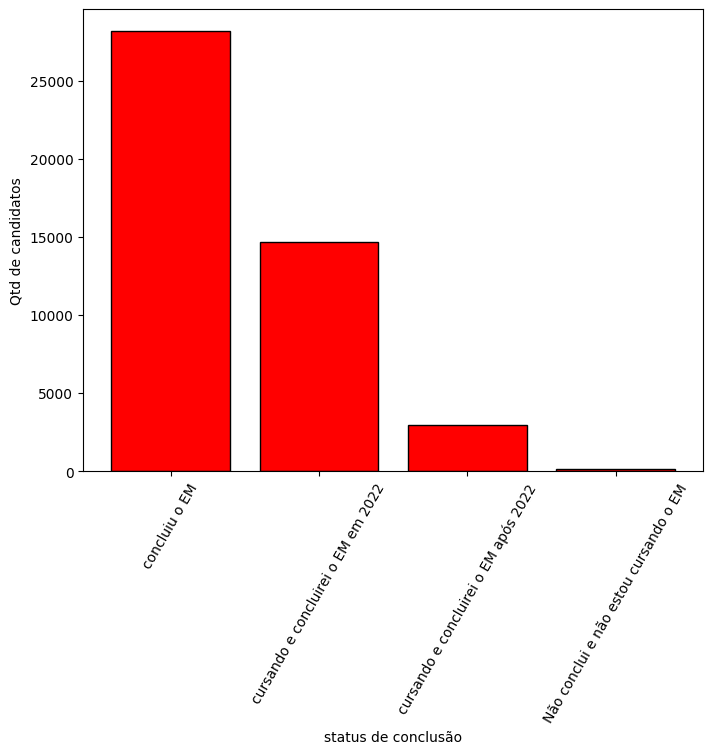

In [21]:
plt.figure(figsize=(8,6))

plt.bar(df_conclusao_em['TP_ST_CONCLUSAO'], df_conclusao_em['NU_INSCRICAO'], color='red', edgecolor='black')

plt.xlabel("status de conclusão")
plt.ylabel("Qtd de candidatos")
plt.xticks(rotation=60)

plt.show()


In [22]:
tipo_escola = {
    1 : "Não respondeu",
    2 : "Pública",
    3 : "Privada"
}

In [23]:
df['TP_ESCOLA'] = df['TP_ESCOLA'].map(tipo_escola)

In [24]:
df_tp_escola = df.groupby('TP_ESCOLA')['NU_INSCRICAO'].agg('count').sort_values(ascending=False).reset_index()
df_tp_escola

,TP_ESCOLA,NU_INSCRICAO
0,Não respondeu,31303
1,Pública,13911
2,Privada,741


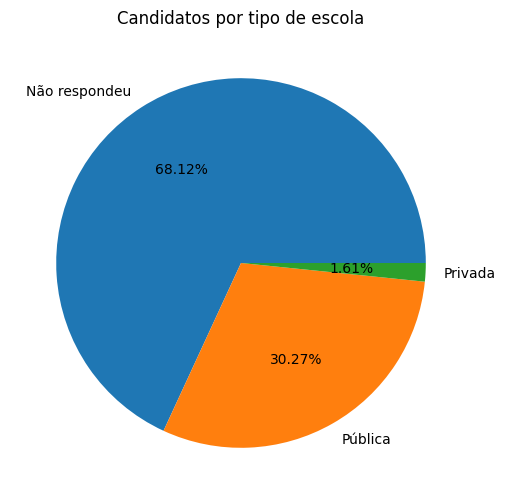

In [25]:
plt.figure(figsize=(6,6))

plt.pie(df_tp_escola['NU_INSCRICAO'], labels = df_tp_escola['TP_ESCOLA'], autopct='%1.2f%%')

plt.title("Candidatos por tipo de escola")

plt.show()

In [26]:
escolaridade_paterna_materna = {
    'A' : 'Nunca estudou',
    'B' : 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C' : 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D' : 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E' : 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F' : 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G' : 'Completou a pós-graduação',
    'H' : 'Não sei'
}

In [27]:
df['Q001'] = df['Q001'].map(escolaridade_paterna_materna)

In [28]:
escolaridade_paterna = df.groupby('Q001')['NU_INSCRICAO'].agg('count').sort_values(ascending=False).reset_index()
escolaridade_paterna

,Q001,NU_INSCRICAO
0,"Completou o Ensino Médio, mas não completou a ...",12168
1,Não completou a 4ª série/5º ano do Ensino Fund...,10506
2,"Completou a 4ª série/5º ano, mas não completou...",6763
3,Completou a 8ª série/9º ano do Ensino Fundamen...,5490
4,Não sei,5388
5,Nunca estudou,2430
6,"Completou a Faculdade, mas não completou a Pós...",2071
7,Completou a pós-graduação,1138


In [29]:
df['Q002'] = df['Q002'].map(escolaridade_paterna_materna)

In [30]:
escolaridade_materna = df.groupby('Q002')['NU_INSCRICAO'].agg('count').sort_values(ascending=False).reset_index()
escolaridade_materna

,Q002,NU_INSCRICAO
0,"Completou o Ensino Médio, mas não completou a ...",16475
1,Não completou a 4ª série/5º ano do Ensino Fund...,7850
2,Completou a 8ª série/9º ano do Ensino Fundamen...,6628
3,"Completou a 4ª série/5º ano, mas não completou...",6424
4,"Completou a Faculdade, mas não completou a Pós...",3224
5,Completou a pós-graduação,2294
6,Nunca estudou,1592
7,Não sei,1467


In [31]:
renda = {
    'A' : 'Nenhuma renda',
    'B' : 'Até R$ 1.212,00',
    'C' : 'De R$ 1.212,01 até R$ 1.818,00.',
    'D' : 'De R$ 1.818,01 até R$ 2.424,00.',
    'E' : 'De R$ 2.424,01 até R$ 3.030,00.',
    'F' : 'De R$ 3.030,01 até R$ 3.636,00.',
    'G' : 'De R$ 3.636,01 até R$ 4.848,00.',
    'H' : 'De R$ 4.848,01 até R$ 6.060,00.',
    'I' : 'De R$ 6.060,01 até R$ 7.272,00.',
    'J' : 'De R$ 7.272,01 até R$ 8.484,00.',
    'K' : 'De R$ 8.484,01 até R$ 9.696,00.',
    'L' : 'De R$ 9.696,01 até R$ 10.908,00.',
    'M' : 'De R$ 10.908,01 até R$ 12.120,00.',
    'N' : 'De R$ 12.120,01 até R$ 14.544,00.',
    'O' : 'De R$ 14.544,01 até R$ 18.180,00.',
    'P' : 'De R$ 18.180,01 até R$ 24.240,00.',
    'Q' : 'Acima de R$ 24.240,00.'
}

In [32]:
df['Q006'] = df['Q006'].map(renda)

In [33]:
df_renda = df.groupby('Q006')['NU_INSCRICAO'].agg('count').sort_values(ascending=False).reset_index()
df_renda

,Q006,NU_INSCRICAO
0,"Até R$ 1.212,00",19070
1,"De R$ 1.212,01 até R$ 1.818,00.",9379
2,"De R$ 1.818,01 até R$ 2.424,00.",5193
3,Nenhuma renda,4281
4,"De R$ 2.424,01 até R$ 3.030,00.",2710
5,"De R$ 3.636,01 até R$ 4.848,00.",1378
6,"De R$ 3.030,01 até R$ 3.636,00.",1348
7,"De R$ 4.848,01 até R$ 6.060,00.",1025
8,"De R$ 6.060,01 até R$ 7.272,00.",403
9,"De R$ 7.272,01 até R$ 8.484,00.",245


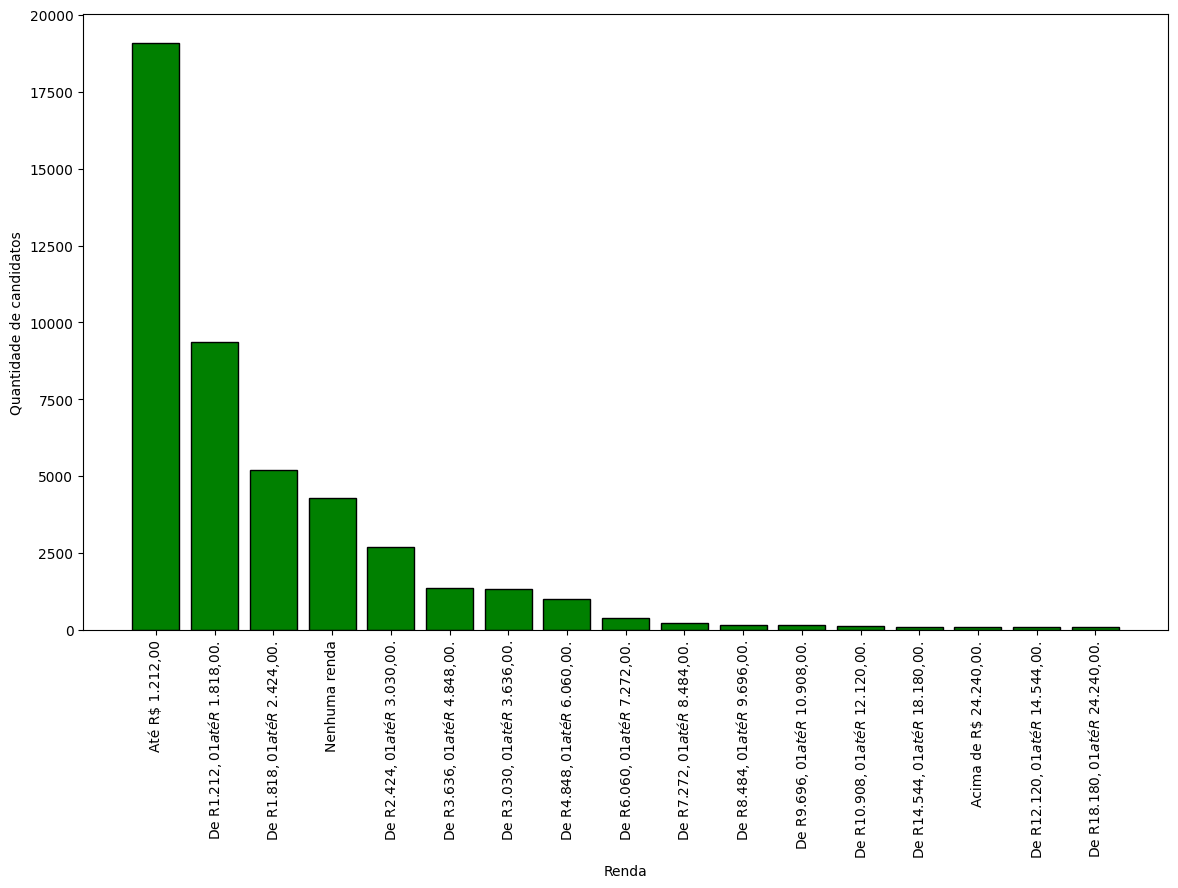

In [34]:
plt.figure(figsize=(14,8))

plt.bar(df_renda['Q006'], df_renda['NU_INSCRICAO'], color='green', edgecolor='black')

plt.xlabel("Renda")
plt.ylabel("Quantidade de candidatos")
plt.xticks(rotation=90)

plt.show()

In [35]:
maior_nota_redacao_por_sexo = df.groupby('TP_SEXO')['NU_NOTA_REDACAO'].agg('max').reset_index()
maior_nota_redacao_por_sexo

,TP_SEXO,NU_NOTA_REDACAO
0,F,980.0
1,M,980.0


In [36]:
menor_nota_redacao_por_sexo = df.groupby('TP_SEXO')['NU_NOTA_REDACAO'].agg('min').reset_index()
menor_nota_redacao_por_sexo

,TP_SEXO,NU_NOTA_REDACAO
0,F,0.0
1,M,0.0


In [37]:
menor_nota_acima_0 = df[df['NU_NOTA_REDACAO'] > 0]

In [38]:
menor_nota_redacao_por_sexo = menor_nota_acima_0.groupby('TP_SEXO')['NU_NOTA_REDACAO'].agg('min').reset_index()
menor_nota_redacao_por_sexo

,TP_SEXO,NU_NOTA_REDACAO
0,F,120.0
1,M,40.0


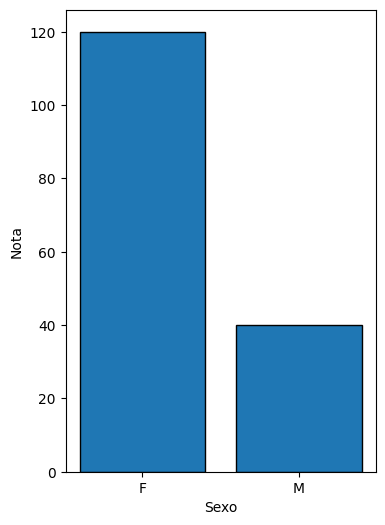

In [39]:
plt.figure(figsize=(4,6))

plt.bar(menor_nota_redacao_por_sexo['TP_SEXO'], menor_nota_redacao_por_sexo['NU_NOTA_REDACAO'], edgecolor='black')

plt.xlabel("Sexo")
plt.ylabel("Nota")

plt.show()

In [40]:
media_nota_por_sexo = df.groupby('TP_SEXO')['NU_NOTA_REDACAO'].agg('mean').reset_index()
media_nota_por_sexo

,TP_SEXO,NU_NOTA_REDACAO
0,F,625.063346
1,M,609.699206


In [41]:
mediana_nota_por_sexo = df.groupby('TP_SEXO')['NU_NOTA_REDACAO'].agg('median').reset_index()
mediana_nota_por_sexo

,TP_SEXO,NU_NOTA_REDACAO
0,F,640.0
1,M,620.0


In [42]:
df_redacao_por_estado = df.groupby('SG_UF_ESC')['NU_NOTA_REDACAO'].agg('max').sort_values(ascending=False).reset_index()
df_redacao_por_estado

,SG_UF_ESC,NU_NOTA_REDACAO
0,MG,980.0
1,MA,980.0
2,RJ,980.0
3,RS,980.0
4,PI,980.0
5,PE,980.0
6,PB,980.0
7,SC,980.0
8,RN,980.0
9,CE,980.0


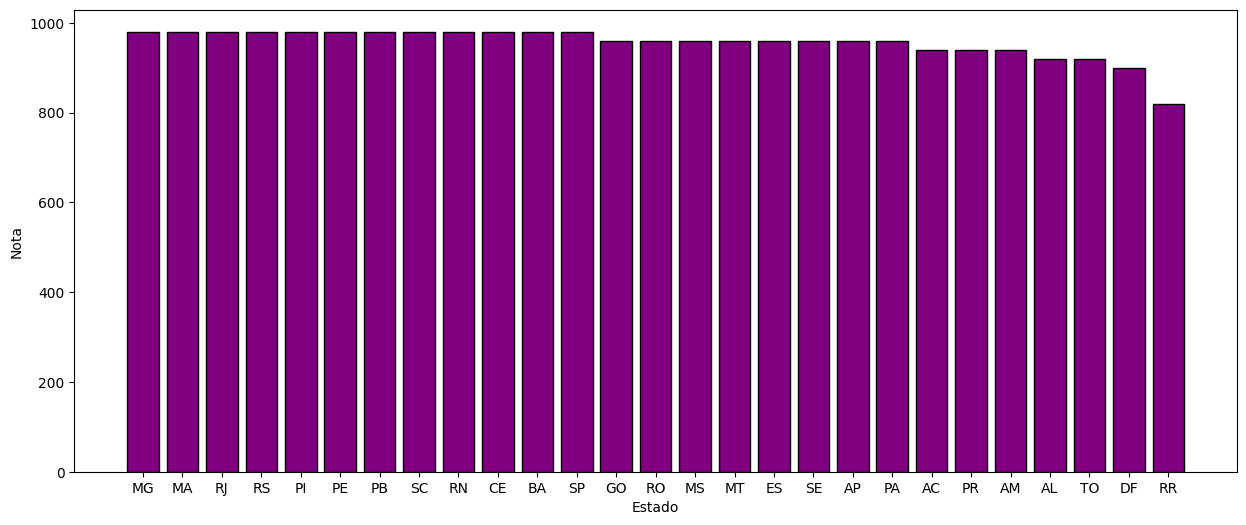

In [43]:
plt.figure(figsize=(15,6))

plt.bar(df_redacao_por_estado['SG_UF_ESC'], df_redacao_por_estado['NU_NOTA_REDACAO'], color='purple', edgecolor='black')

plt.xlabel("Estado")
plt.ylabel("Nota")

plt.show()

In [44]:
media_redacao_por_estado = round(df.groupby('SG_UF_ESC')['NU_NOTA_REDACAO'].agg('mean').sort_values(ascending=False).reset_index(), 2)
media_redacao_por_estado

,SG_UF_ESC,NU_NOTA_REDACAO
0,PI,695.51
1,SE,693.53
2,ES,679.77
3,MG,679.27
4,MA,671.02
5,CE,667.41
6,TO,664.83
7,SC,664.36
8,MS,661.75
9,PB,660.57


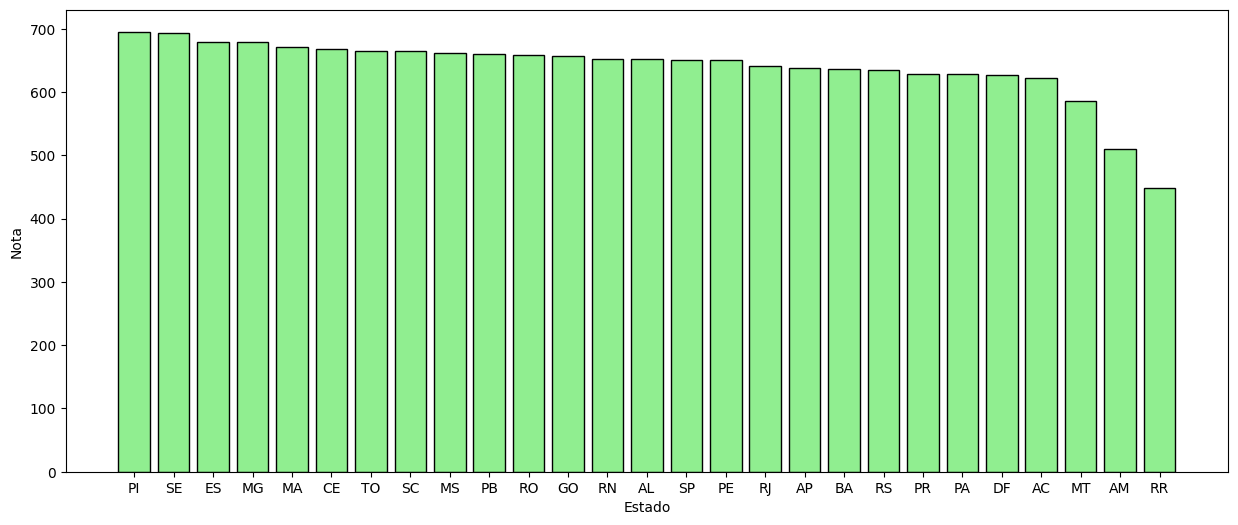

In [45]:
plt.figure(figsize=(15,6))

plt.bar(media_redacao_por_estado['SG_UF_ESC'], media_redacao_por_estado['NU_NOTA_REDACAO'], color='lightgreen', edgecolor='black')

plt.xlabel("Estado")
plt.ylabel("Nota")

plt.show()

In [46]:
media_redacao_estado_por_sexo = round(df.groupby(['SG_UF_ESC', 'TP_SEXO'])['NU_NOTA_REDACAO'].agg('mean').reset_index(),2)
media_redacao_estado_por_sexo

,SG_UF_ESC,TP_SEXO,NU_NOTA_REDACAO
0,AC,F,610.00
1,AC,M,636.36
2,AL,F,671.65
3,AL,M,620.80
4,AM,F,529.55
5,AM,M,464.89
6,AP,F,672.90
7,AP,M,574.12
8,BA,F,645.82
9,BA,M,618.11


<Figure size 2000x1500 with 0 Axes>

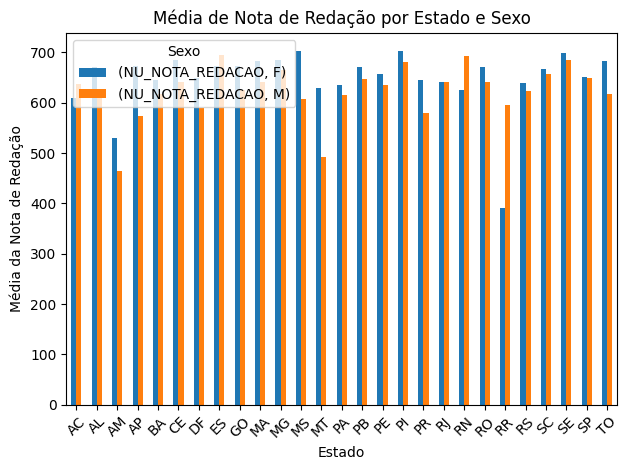

In [51]:
plt.figure(figsize=(20, 15))

# Agrupar por estado e sexo
grouped = media_redacao_estado_por_sexo.groupby(['SG_UF_ESC', 'TP_SEXO']).mean().unstack()

# Plotar barras agrupadas
grouped.plot(kind='bar', stacked=False)
plt.title('Média de Nota de Redação por Estado e Sexo')
plt.xlabel('Estado')
plt.ylabel('Média da Nota de Redação')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
